In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

: 

In [2]:
df=pd.read_csv("Salary Prediction of Data Professions.csv")
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [3]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [5]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2631 non-null   object 
 1   LAST NAME         2631 non-null   object 
 2   SEX               2631 non-null   object 
 3   DOJ               2631 non-null   object 
 4   CURRENT DATE      2631 non-null   object 
 5   DESIGNATION       2631 non-null   object 
 6   AGE               2631 non-null   float64
 7   SALARY            2631 non-null   int64  
 8   UNIT              2631 non-null   object 
 9   LEAVES USED       2631 non-null   float64
 10  LEAVES REMAINING  2631 non-null   float64
 11  RATINGS           2631 non-null   float64
 12  PAST EXP          2631 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 287.8+ KB


In [7]:
df['DOJ']=pd.to_datetime(df['DOJ'])
df['CURRENT DATE']=pd.to_datetime(df['CURRENT DATE'])
df['Total_time_in_company']=(df['CURRENT DATE']-df['DOJ']).dt.days/30
df['Total_time_in_company']=df['Total_time_in_company'].astype(int)

In [8]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Total_time_in_company
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,19
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,17
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,33
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,28
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,18


In [9]:
#now droping the joining date and current date
df.drop(['CURRENT DATE','DOJ'],axis=1,inplace=True)

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 0 to 2638
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIRST NAME             2631 non-null   object 
 1   LAST NAME              2631 non-null   object 
 2   SEX                    2631 non-null   object 
 3   DESIGNATION            2631 non-null   object 
 4   AGE                    2631 non-null   float64
 5   SALARY                 2631 non-null   int64  
 6   UNIT                   2631 non-null   object 
 7   LEAVES USED            2631 non-null   float64
 8   LEAVES REMAINING       2631 non-null   float64
 9   RATINGS                2631 non-null   float64
 10  PAST EXP               2631 non-null   int64  
 11  Total_time_in_company  2631 non-null   int32  
dtypes: float64(4), int32(1), int64(2), object(5)
memory usage: 256.9+ KB


In [11]:
total_profassionalist = df.groupby('DESIGNATION').agg({'SEX':'count'}).reset_index()
total_profassionalist

,DESIGNATION,SEX
0,Analyst,1943
1,Associate,158
2,Director,32
3,Manager,81
4,Senior Analyst,356
5,Senior Manager,61


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


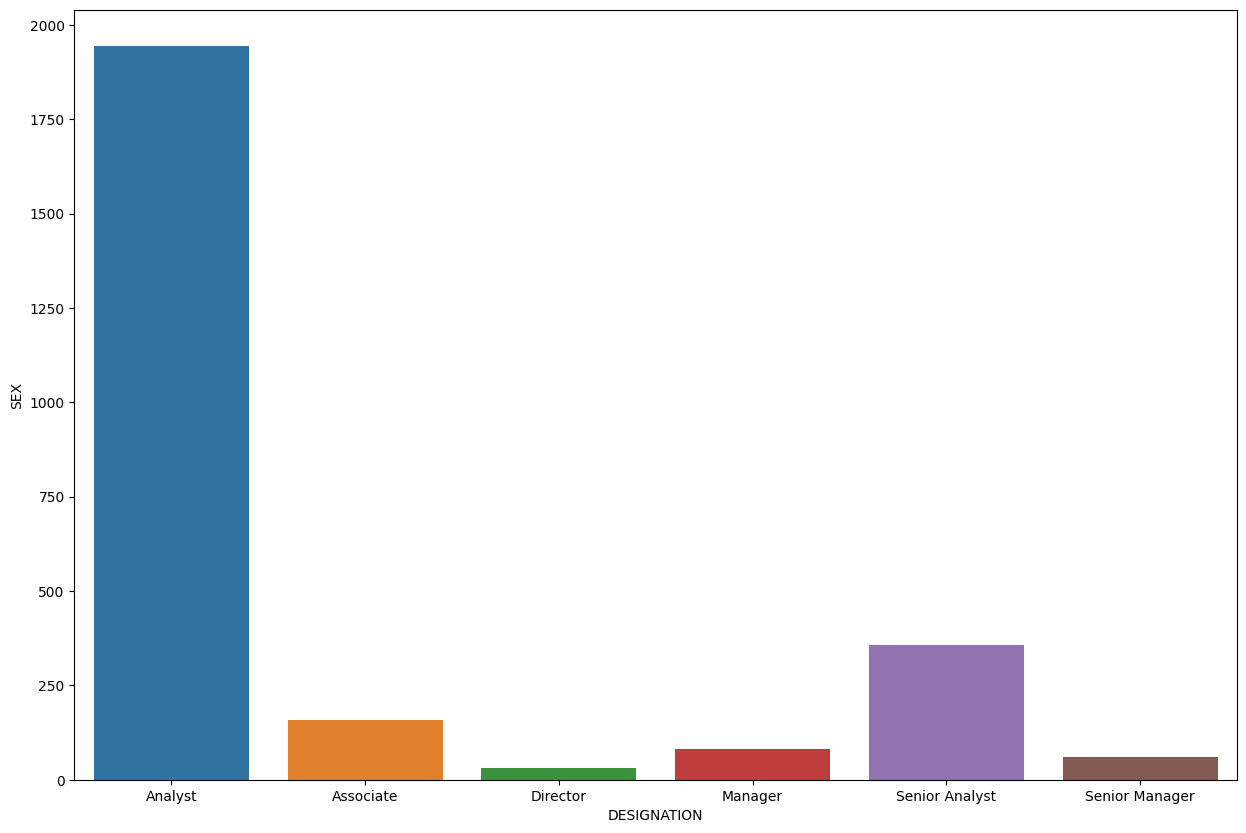

In [12]:
plt.figure(figsize=(15,10))
sns.barplot(data=total_profassionalist,x='DESIGNATION',y='SEX')

plt.show()

In [13]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DESIGNATION', 'AGE', 'SALARY',
       'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP',
       'Total_time_in_company'],
      dtype='object')

In [14]:
total_profassionalist_depat = df.groupby(['DESIGNATION','UNIT']).agg({'SALARY':'max'}).reset_index()
total_profassionalist_depat

,DESIGNATION,UNIT,SALARY
0,Analyst,Finance,49953
1,Analyst,IT,49980
2,Analyst,Management,49904
3,Analyst,Marketing,49974
4,Analyst,Operations,49942
5,Analyst,Web,49976
6,Associate,Finance,99311
7,Associate,IT,97830
8,Associate,Management,99416
9,Associate,Marketing,99603


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

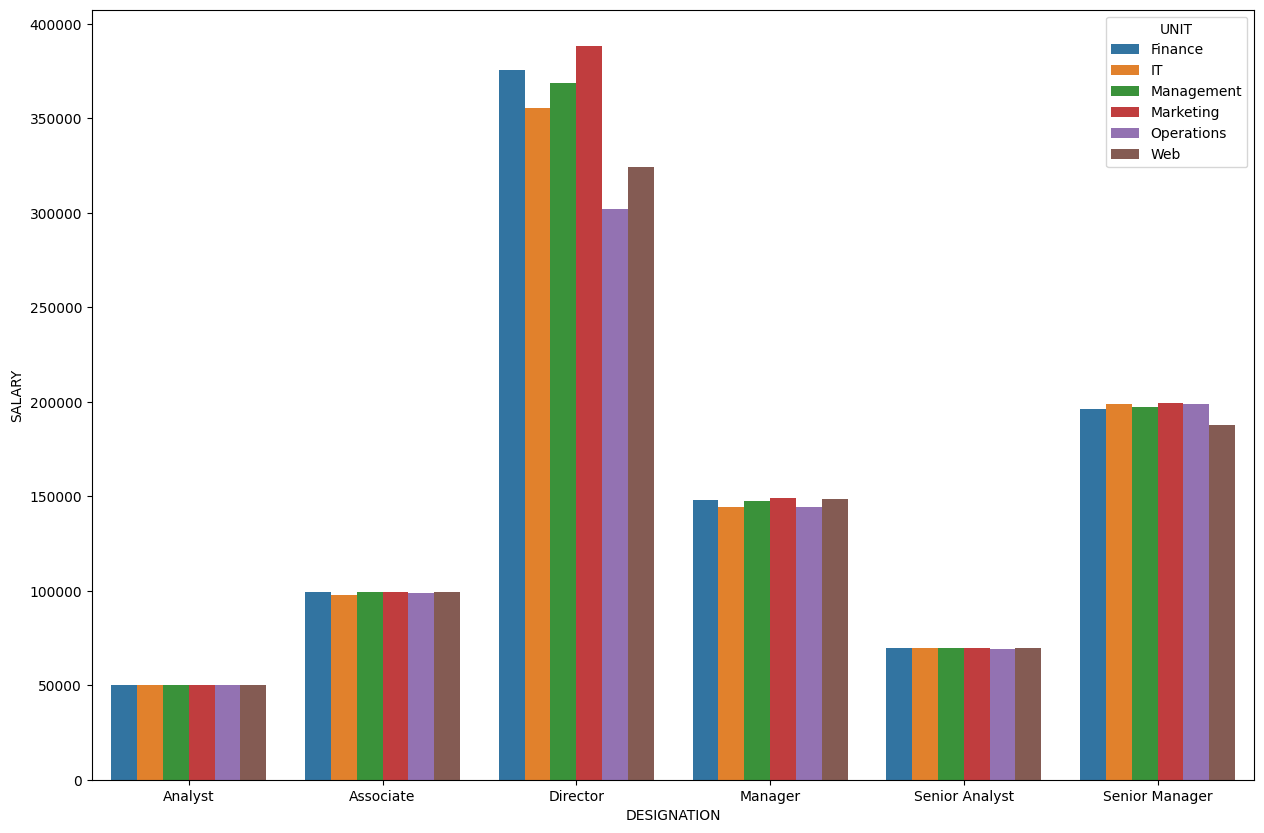

In [15]:
plt.figure(figsize=(15,10))
ax=sns.barplot(data=total_profassionalist_depat,x='DESIGNATION',y='SALARY',hue='UNIT')

plt.show()

In [16]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DESIGNATION', 'AGE', 'SALARY',
       'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP',
       'Total_time_in_company'],
      dtype='object')

In [17]:
data = df.groupby(['DESIGNATION','AGE','UNIT','PAST EXP','Total_time_in_company']).agg({'SALARY':'max','RATINGS':'max'}).reset_index()

In [18]:
data.sort_values(by='SALARY',ascending=False).head(10)

,DESIGNATION,AGE,UNIT,PAST EXP,Total_time_in_company,SALARY,RATINGS
882,Director,42.0,Marketing,18,35,388112,2.0
878,Director,41.0,Finance,14,77,375647,5.0
868,Director,39.0,Management,13,17,368887,3.0
869,Director,39.0,Marketing,13,37,366063,3.0
879,Director,41.0,IT,12,62,355337,3.0
891,Director,45.0,Finance,19,40,324783,5.0
885,Director,42.0,Web,16,11,324129,3.0
881,Director,41.0,Marketing,10,67,323196,3.0
893,Director,45.0,Management,18,42,320148,2.0
874,Director,40.0,IT,15,14,319742,4.0


In [19]:
data.sort_values(by='RATINGS',ascending=False).head(10)

,DESIGNATION,AGE,UNIT,PAST EXP,Total_time_in_company,SALARY,RATINGS
0,Analyst,21.0,Finance,0,11,45774,5.0
583,Analyst,25.0,Finance,2,21,46350,5.0
573,Analyst,24.0,Web,2,16,44002,5.0
574,Analyst,24.0,Web,2,17,46779,5.0
575,Analyst,25.0,Finance,1,31,43884,5.0
577,Analyst,25.0,Finance,1,33,46659,5.0
578,Analyst,25.0,Finance,1,34,48458,5.0
579,Analyst,25.0,Finance,1,36,44354,5.0
581,Analyst,25.0,Finance,2,19,45081,5.0
582,Analyst,25.0,Finance,2,20,48784,5.0


In [20]:
df['UNIT'].unique()
df['UNIT']=df['UNIT'].map({'Finance':1,'Web':2,'IT':3,'Operations':4,'Marketing':5,'Management':6})

In [21]:
df["DESIGNATION"].unique()
#df["DESIGNATION"]=df["DESIGNATION"].map({'Analyst':0, 'Senior Analyst':1, 'Associate':2, 'Senior Manager':3,'Manager':4, 'Director':5})

array(['Analyst', 'Senior Analyst', 'Associate', 'Senior Manager',
       'Manager', 'Director'], dtype=object)

In [22]:
# since designation is a ordinal categorical variable and we cant use it for dummy variable
# and we want to give value them using their seniority.
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the data
df['DESIGNATION']= label_encoder.fit_transform(df['DESIGNATION'])



In [23]:
df['DESIGNATION'].unique()

array([0, 4, 1, 5, 3, 2])

In [24]:
df['SEX'].unique()
df['SEX']=df['SEX'].map({'F':0, 'M':1})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 0 to 2638
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIRST NAME             2631 non-null   object 
 1   LAST NAME              2631 non-null   object 
 2   SEX                    2631 non-null   int64  
 3   DESIGNATION            2631 non-null   int32  
 4   AGE                    2631 non-null   float64
 5   SALARY                 2631 non-null   int64  
 6   UNIT                   2631 non-null   int64  
 7   LEAVES USED            2631 non-null   float64
 8   LEAVES REMAINING       2631 non-null   float64
 9   RATINGS                2631 non-null   float64
 10  PAST EXP               2631 non-null   int64  
 11  Total_time_in_company  2631 non-null   int32  
dtypes: float64(4), int32(2), int64(4), object(2)
memory usage: 246.7+ KB


In [26]:
df['NAME']=df['FIRST NAME']+' '+df['LAST NAME']

In [27]:
df.head()

,FIRST NAME,LAST NAME,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Total_time_in_company,NAME
0,TOMASA,ARMEN,0,0,21.0,44570,1,24.0,6.0,2.0,0,19,TOMASA ARMEN
2,OLIVE,ANCY,0,0,21.0,40955,1,23.0,7.0,3.0,0,17,OLIVE ANCY
3,CHERRY,AQUILAR,0,0,22.0,45550,3,22.0,8.0,3.0,0,33,CHERRY AQUILAR
6,ELLIOT,AGULAR,1,0,22.0,40339,5,19.0,11.0,5.0,0,28,ELLIOT AGULAR
8,KATHY,ALSOP,0,4,28.0,63478,4,20.0,10.0,3.0,1,18,KATHY ALSOP


In [28]:
df.drop(['FIRST NAME','LAST NAME'],axis=1,inplace=True)

In [29]:
df1=df.iloc[:,:-1]
df1

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Total_time_in_company
0,0,0,21.0,44570,1,24.0,6.0,2.0,0,19
2,0,0,21.0,40955,1,23.0,7.0,3.0,0,17
3,0,0,22.0,45550,3,22.0,8.0,3.0,0,33
6,1,0,22.0,40339,5,19.0,11.0,5.0,0,28
8,0,4,28.0,63478,4,20.0,10.0,3.0,1,18
...,...,...,...,...,...,...,...,...,...,...
2634,0,5,36.0,185977,6,15.0,15.0,5.0,10,55
2635,0,0,23.0,45758,3,17.0,13.0,2.0,0,24
2636,0,0,21.0,47315,2,29.0,1.0,5.0,0,23
2637,0,0,24.0,45172,2,23.0,7.0,3.0,1,22


In [30]:
cor=df1.corr()
cor


,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Total_time_in_company
SEX,1.000000,0.001672,-0.016458,-0.028537,0.019135,0.010609,-0.010609,-0.038273,-0.022794,-0.007756
DESIGNATION,0.001672,1.000000,0.626404,0.496911,0.011358,-0.000216,0.000216,0.014781,0.457396,0.346846
AGE,-0.016458,0.626404,1.000000,0.871929,0.007580,0.007143,-0.007143,0.039134,0.903659,0.458761
SALARY,-0.028537,0.496911,0.871929,1.000000,0.009109,0.006850,-0.006850,0.021702,0.854024,0.434850
UNIT,0.019135,0.011358,0.007580,0.009109,1.000000,0.007757,-0.007757,0.023897,0.002491,0.005337
LEAVES USED,0.010609,-0.000216,0.007143,0.006850,0.007757,1.000000,-1.000000,0.004352,0.007832,0.013198
LEAVES REMAINING,-0.010609,0.000216,-0.007143,-0.006850,-0.007757,-1.000000,1.000000,-0.004352,-0.007832,-0.013198
RATINGS,-0.038273,0.014781,0.039134,0.021702,0.023897,0.004352,-0.004352,1.000000,0.042497,0.016660
PAST EXP,-0.022794,0.457396,0.903659,0.854024,0.002491,0.007832,-0.007832,0.042497,1.000000,0.220933
Total_time_in_company,-0.007756,0.346846,0.458761,0.434850,0.005337,0.013198,-0.013198,0.016660,0.220933,1.000000


In [31]:
cor['SEX']

SEX                      1.000000
DESIGNATION              0.001672
AGE                     -0.016458
SALARY                  -0.028537
UNIT                     0.019135
LEAVES USED              0.010609
LEAVES REMAINING        -0.010609
RATINGS                 -0.038273
PAST EXP                -0.022794
Total_time_in_company   -0.007756
Name: SEX, dtype: float64

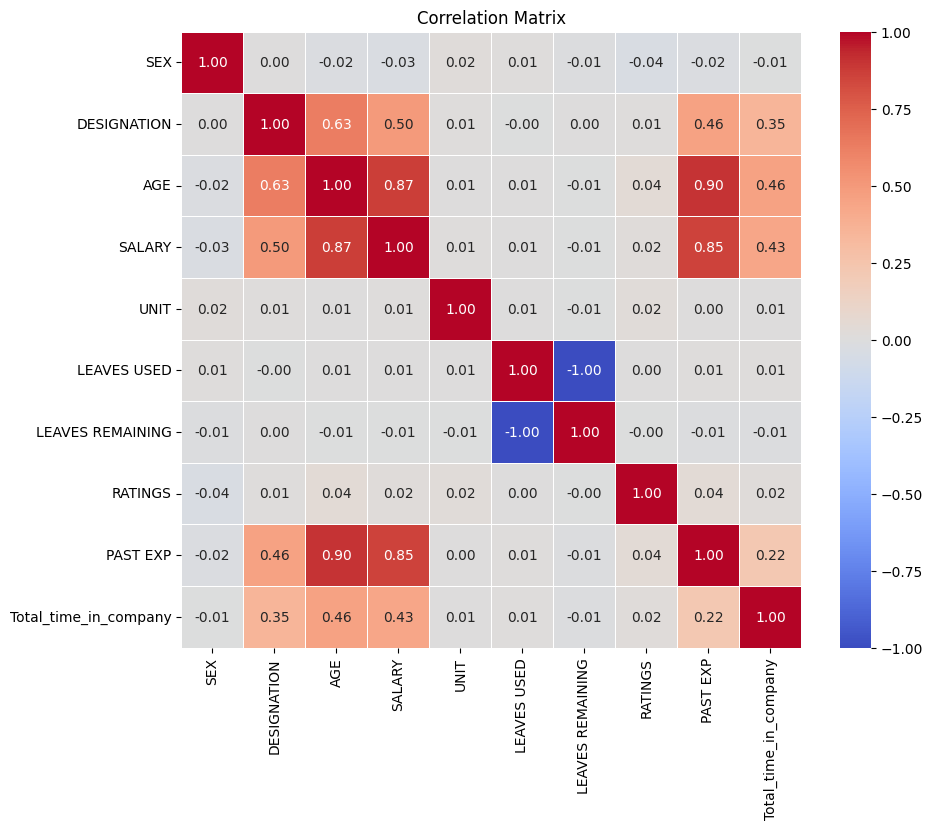

In [32]:

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


In [33]:
# here we can judge that leaves remaining and leaves used have highly negative corelation and it couldnot affect the 
# target variavle as well so we can drop one of them.
df1.drop('LEAVES USED',axis=1,inplace=True)

In [34]:
cor_matrix=df1.corr()
cor_matrix

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES REMAINING,RATINGS,PAST EXP,Total_time_in_company
SEX,1.000000,0.001672,-0.016458,-0.028537,0.019135,-0.010609,-0.038273,-0.022794,-0.007756
DESIGNATION,0.001672,1.000000,0.626404,0.496911,0.011358,0.000216,0.014781,0.457396,0.346846
AGE,-0.016458,0.626404,1.000000,0.871929,0.007580,-0.007143,0.039134,0.903659,0.458761
SALARY,-0.028537,0.496911,0.871929,1.000000,0.009109,-0.006850,0.021702,0.854024,0.434850
UNIT,0.019135,0.011358,0.007580,0.009109,1.000000,-0.007757,0.023897,0.002491,0.005337
LEAVES REMAINING,-0.010609,0.000216,-0.007143,-0.006850,-0.007757,1.000000,-0.004352,-0.007832,-0.013198
RATINGS,-0.038273,0.014781,0.039134,0.021702,0.023897,-0.004352,1.000000,0.042497,0.016660
PAST EXP,-0.022794,0.457396,0.903659,0.854024,0.002491,-0.007832,0.042497,1.000000,0.220933
Total_time_in_company,-0.007756,0.346846,0.458761,0.434850,0.005337,-0.013198,0.016660,0.220933,1.000000


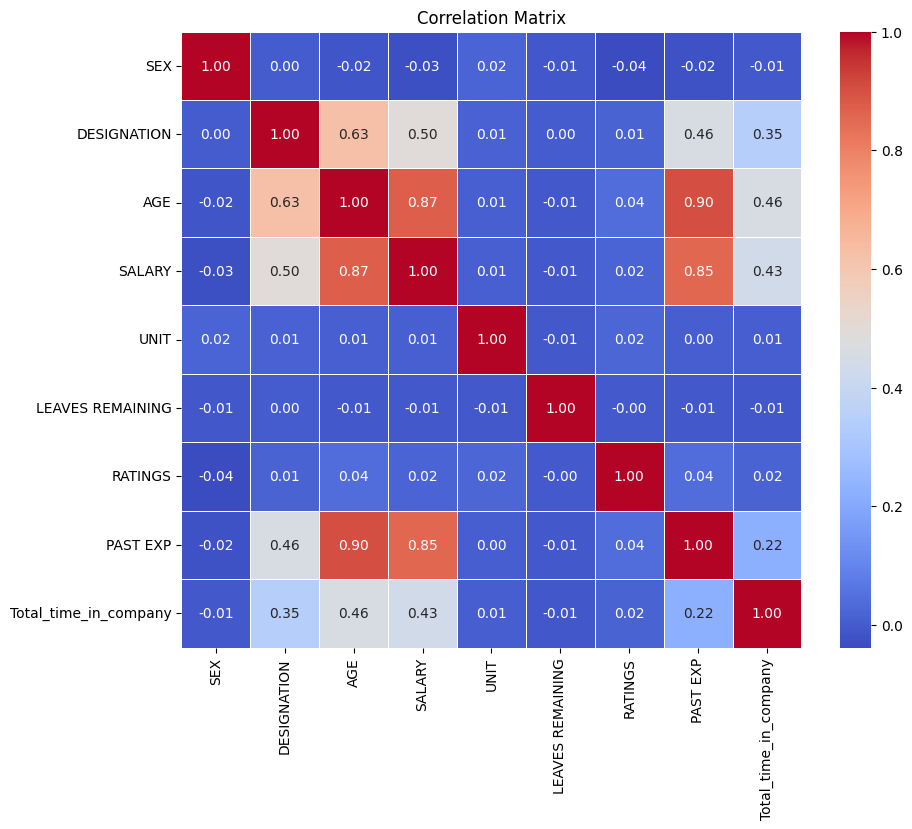

In [35]:

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [36]:

#plt.figure(figsize=(15, 10))
#sns.pairplot(df1)
#plt.show()

In [37]:
df1.columns


Index(['SEX', 'DESIGNATION', 'AGE', 'SALARY', 'UNIT', 'LEAVES REMAINING',
       'RATINGS', 'PAST EXP', 'Total_time_in_company'],
      dtype='object')

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

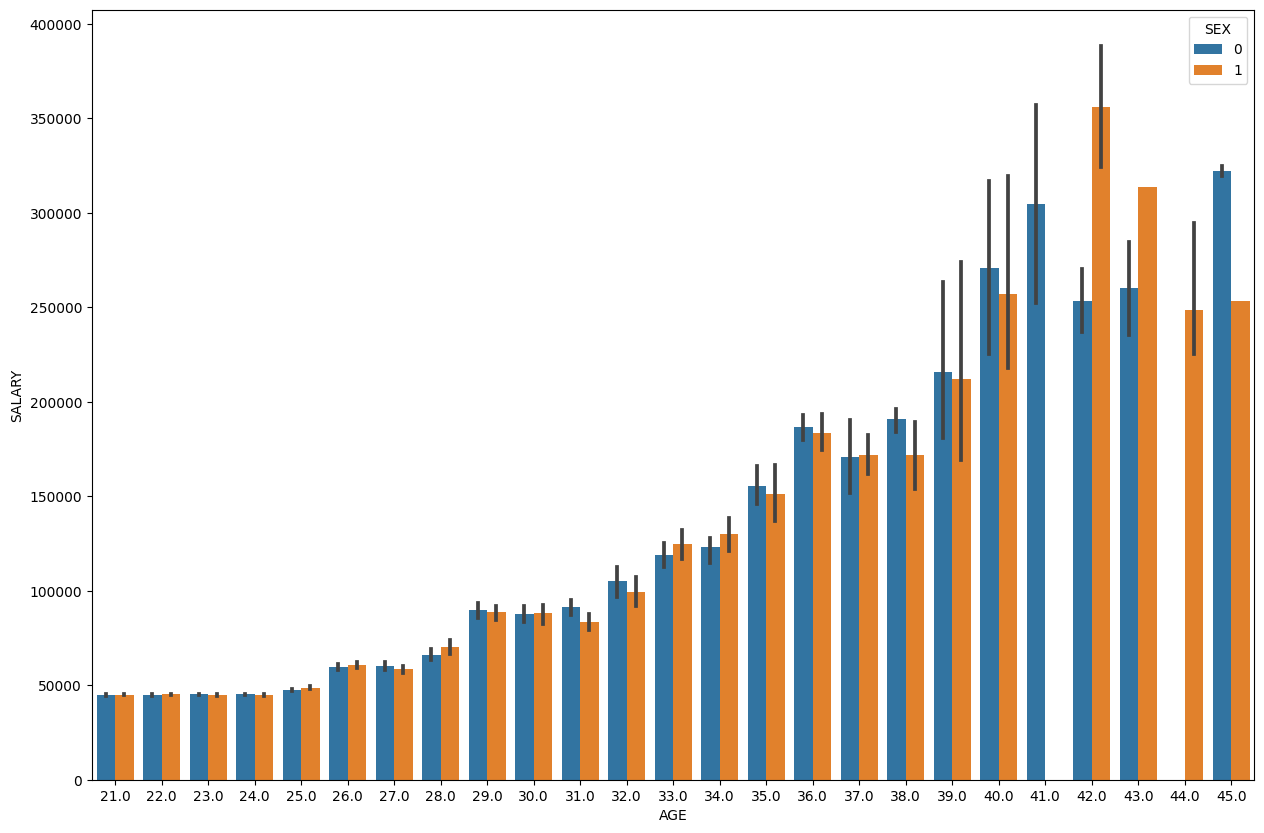

In [38]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df1,x='AGE',y='SALARY',hue='SEX')
plt.show()


### observation
1. Ratio of male and female is almost same but we can say females are more in little number.

In [39]:
df1.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES REMAINING,RATINGS,PAST EXP,Total_time_in_company
0,0,0,21.0,44570,1,6.0,2.0,0,19
2,0,0,21.0,40955,1,7.0,3.0,0,17
3,0,0,22.0,45550,3,8.0,3.0,0,33
6,1,0,22.0,40339,5,11.0,5.0,0,28
8,0,4,28.0,63478,4,10.0,3.0,1,18


### split the data set for train and test

In [40]:
x=df1.drop('SALARY',axis=1)
x

,SEX,DESIGNATION,AGE,UNIT,LEAVES REMAINING,RATINGS,PAST EXP,Total_time_in_company
0,0,0,21.0,1,6.0,2.0,0,19
2,0,0,21.0,1,7.0,3.0,0,17
3,0,0,22.0,3,8.0,3.0,0,33
6,1,0,22.0,5,11.0,5.0,0,28
8,0,4,28.0,4,10.0,3.0,1,18
...,...,...,...,...,...,...,...,...
2634,0,5,36.0,6,15.0,5.0,10,55
2635,0,0,23.0,3,13.0,2.0,0,24
2636,0,0,21.0,2,1.0,5.0,0,23
2637,0,0,24.0,2,7.0,3.0,1,22


In [41]:
y=df1['SALARY']
y

0        44570
2        40955
3        45550
6        40339
8        63478
         ...  
2634    185977
2635     45758
2636     47315
2637     45172
2638     49176
Name: SALARY, Length: 2631, dtype: int64

In [42]:
print(x.shape)

(2631, 8)


In [43]:
print(y.shape)

(2631,)


In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1973, 8)
(658, 8)
(1973,)
(658,)


### feature scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


# Models
## linear regression

In [47]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred= lm.predict(X_test)


In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [50]:
acc_score=r2_score(y_test,y_pred)
acc_score

0.8274364988608469

### decion tree regression


In [51]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()


In [52]:
parameter={'max_depth':[None,1,2,3,4,5,6,7,8,9,12,13,14,15,16],'min_samples_split': [2 ,5,4,6,8,9,3, 10]}

In [53]:
g_search = GridSearchCV(estimator=dt, param_grid=parameter, cv=5, scoring='neg_mean_squared_error')
g_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13,
                                       14, 15, 16],
                         'min_samples_split': [2, 5, 4, 6, 8, 9, 3, 10]},
             scoring='neg_mean_squared_error')

In [54]:
# Get the best hyperparameters
best_params = g_search.best_params_
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']

In [55]:
print(best_max_depth)

5


In [56]:
print(best_min_samples_split)

5


In [57]:

best_model = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
best_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=5)

In [58]:
# predict thr result
y_pred1= best_model.predict(X_test)

In [59]:
acc_score1=r2_score(y_test,y_pred1)
acc_score1

0.9548300627743835

In [60]:
mse=mean_squared_error(y_test,y_pred1)
mse

55559576.272875406

### random forest

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()


In [62]:
paramter={
         'criterion':['squared_error','absolute_error'],
         'max_depth':[2,3,4,6,8,10,20,12,16,18],
         'min_samples_split':[3,2,5,7,8,9,10,13,12]
}

In [63]:
g_search = RandomizedSearchCV(estimator=rf, param_distributions=paramter, cv=5, scoring='neg_mean_squared_error')
g_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 6, 8, 10, 20, 12,
                                                      16, 18],
                                        'min_samples_split': [3, 2, 5, 7, 8, 9,
                                                              10, 13, 12]},
                   scoring='neg_mean_squared_error')

In [64]:
g_search = RandomizedSearchCV(estimator=rf, param_distributions=paramter, cv=5, scoring='neg_mean_squared_error')
g_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 6, 8, 10, 20, 12,
                                                      16, 18],
                                        'min_samples_split': [3, 2, 5, 7, 8, 9,
                                                              10, 13, 12]},
                   scoring='neg_mean_squared_error')

In [65]:
best_param = g_search.best_params_
best_criterion=best_param['criterion']
best_max_depth=best_param['max_depth']
best_min_samples_split=best_param['min_samples_split']

In [66]:
print(best_criterion)
print(best_max_depth)
print(best_min_samples_split)

squared_error
20
7


In [67]:
best_model = RandomForestRegressor(criterion=best_criterion,max_depth=best_max_depth,min_samples_split=best_min_samples_split)
best_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_split=7)

In [68]:
y_pred2=best_model.predict(X_test)
y_pred2

array([ 44902.54225298,  45714.16031799,  88911.23621212,  44940.78036525,
        45478.91438503,  44327.52358525,  44347.06048946,  45380.58939481,
        45237.40551401,  45043.89275322,  45785.34509461, 185606.77756205,
        44304.10435937,  47349.7990714 ,  45227.72662775,  44538.50344012,
        45835.78655403,  44957.66685767,  44691.88645091,  44927.15006765,
        61647.13177758, 263742.3285467 ,  44387.25752602, 118469.16568687,
        53904.01804584,  43674.68140987,  44633.47015188,  45846.439975  ,
        44466.52947655,  44049.93724838,  83012.86069467,  61635.30587948,
        45374.92935908,  44452.62877502,  44348.30691775,  44835.36673233,
        44847.02118203,  45435.05364769,  44268.23261688,  46162.66665533,
        45360.00386324,  46109.72024603,  60927.40946662,  46237.58781512,
        45446.11312734,  45716.40580021,  44234.651821  ,  84822.80951435,
        56991.42627706,  46611.08795101,  45908.70824631,  44158.54587696,
        43825.76892847,  

In [69]:
mse1=mean_squared_error(y_test,y_pred2)
mse1

52190218.54003896

In [70]:
acc_score2=r2_score(y_test,y_pred2)
acc_score2

0.9575693507152307

### Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()


In [72]:
paramters={
         'loss':['squared_error','absolute_error'],
         'max_depth':[3,4,6,8,10,20,12,16,18],
         'min_samples_split':[3,2,5,7,8,9,10,13,12],
         'learning_rate':[0.1,0.01,0.001]
}

In [73]:
g_search = RandomizedSearchCV(estimator=gbr, param_distributions=paramters, cv=5, scoring='neg_mean_squared_error')
g_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'loss': ['squared_error',
                                                 'absolute_error'],
                                        'max_depth': [3, 4, 6, 8, 10, 20, 12,
                                                      16, 18],
                                        'min_samples_split': [3, 2, 5, 7, 8, 9,
                                                              10, 13, 12]},
                   scoring='neg_mean_squared_error')

In [74]:
best_para = g_search.best_params_
best_learning_rate=best_para['learning_rate']
best_max_dept=best_para['max_depth']
best_min_sample_split=best_para['min_samples_split']
best_loss=best_para['loss']

In [75]:
print(best_learning_rate)
print(best_max_dept)
print(best_loss)
print(best_min_sample_split)

0.1
12
squared_error
7


In [76]:
good_model=GradientBoostingRegressor(learning_rate=best_learning_rate,loss=best_loss,max_depth=best_max_dept,min_samples_split=best_min_sample_split)
good_model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=12, min_samples_split=7)

In [77]:
y_pred3 = good_model.predict(X_test)

In [78]:
mse2=mean_squared_error(y_test,y_pred3)
mse2

54190192.60767933

In [79]:
acc_score3 = r2_score(y_test,y_pred3)
acc_score3

0.9559433717364767

## compare all the models by graph

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

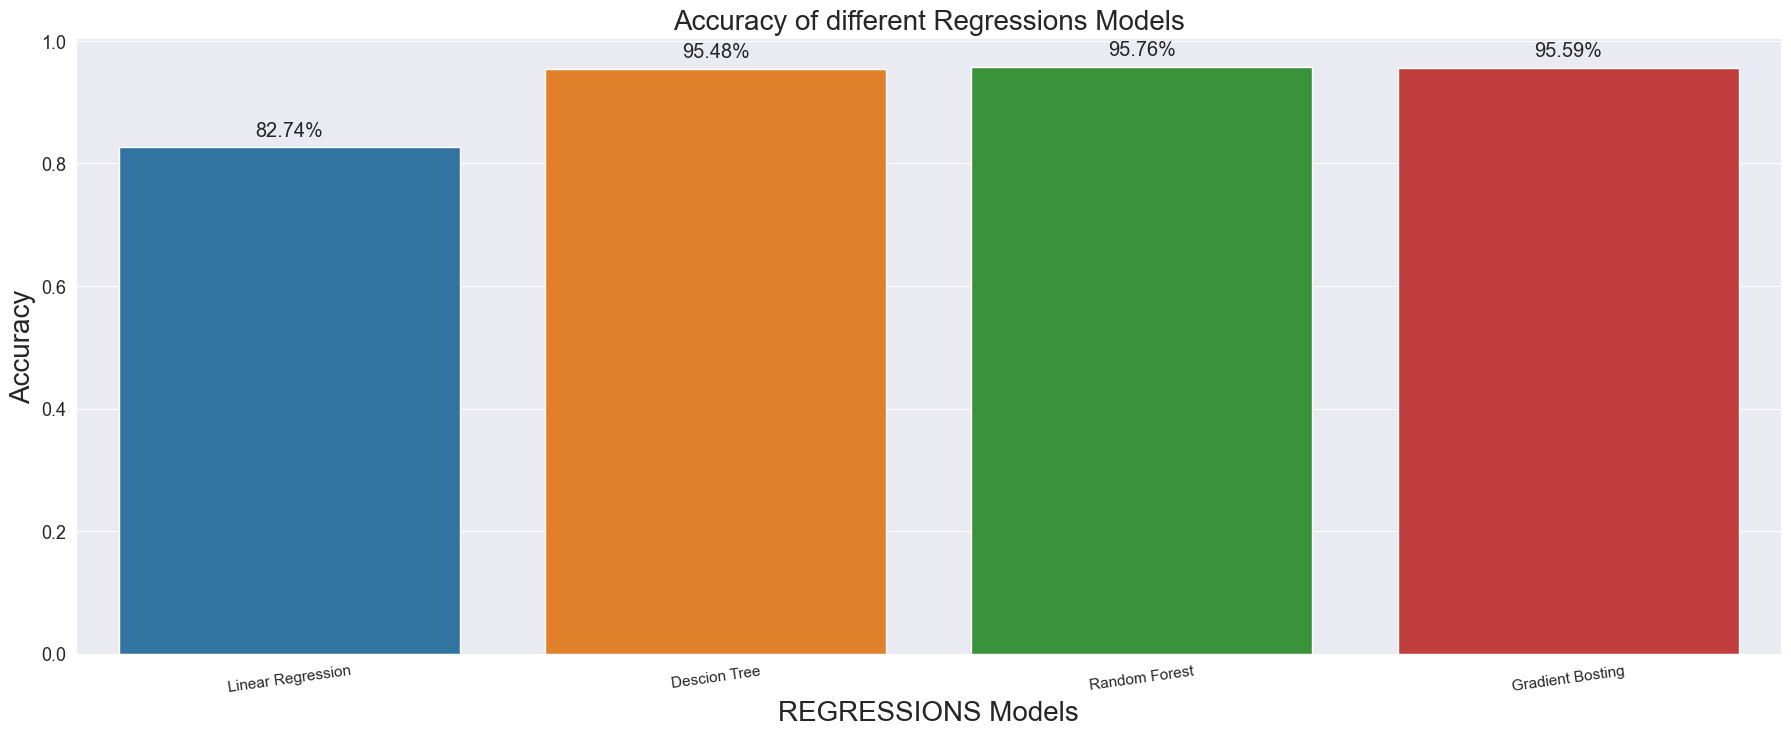

In [80]:
mylist=[]
mylist2=[]
mylist.append(acc_score)
mylist2.append("Linear Regression")
mylist.append(acc_score1)
mylist2.append("Descion Tree")
mylist.append(acc_score2)
mylist2.append("Random Forest")
mylist.append(acc_score3)
mylist2.append("Gradient Bosting")

plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=mylist2, y=mylist)
plt.xlabel("REGRESSIONS Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Regressions Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate( f'{height:.2%}',(x + width/2, y + height*1.02) , ha='center',fontsize = 'x-large')

plt.show()


# Making pickle file

In [81]:
import pickle

In [82]:
pickle.dump(sc,open("scaler.pickle","wb"))
ssc=pickle.load(open("scaler.pickle","rb"))
pickle.dump(best_model,open("random_forest.pkl","wb"))
model=pickle.load(open("random_forest.pkl","rb"))